In [1]:
import torch
import torchvision
import torchvision.models as models
import pandas as pd
import numpy as np

from PIL import Image
from pathlib import Path
from tqdm.auto import tqdm

In [2]:
# https://www.kaggle.com/andrewmvd/pollen-grain-image-classification
data_path = Path('data/pollen-grain-image-classification/')

In [3]:
img_flist = list(data_path.glob('*.jpg'))
img_flist[0]

PosixPath('data/pollen-grain-image-classification/anadenanthera_16.jpg')

In [4]:
len(img_flist)

790

In [21]:
transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

pretrained_model = models.resnet18(pretrained=True)
pretrained_model.eval()

In [24]:
def get_img_vec(img):
    feature_extractor = torch.nn.Sequential(*list(pretrained_model.children())[:-1])
    img = transforms(img).unsqueeze(dim=0)
    output = feature_extractor(img)
    output = torch.squeeze(output).detach().numpy()
    return output

In [25]:
img_path = img_flist[0]
img = Image.open(img_path)
vec = get_img_vec(img)
vec.shape

(512,)

In [10]:
import re

X = []
y = []

for img_fpath in tqdm(img_flist):
    img = Image.open(img_fpath)
    vec = get_img_vec(img)
    label = re.split('_| ', img_fpath.name)[0]
    X.append(vec)
    y.append(label)

X = pd.DataFrame(X)
y = pd.Series(y)

  0%|          | 0/790 [00:00<?, ?it/s]

In [11]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,1.339875,0.328597,1.292346,1.133927,0.544513,0.392154,2.509728,1.109416,0.920267,0.354975,...,0.217648,0.625341,2.253731,0.012568,0.766533,1.011089,0.338930,0.711118,0.608330,0.613997
1,0.201643,0.419185,0.500751,1.716043,0.019110,0.643496,1.256870,0.339626,1.825647,0.839047,...,0.531199,0.694212,0.911593,0.024255,0.348792,0.339363,0.362118,0.285629,0.444145,0.539838
2,0.758076,0.241719,0.814049,0.832038,0.162181,0.161663,2.295728,0.428957,0.536558,0.490910,...,0.709063,0.898288,1.654396,0.172455,0.465595,2.240495,0.727283,0.493300,0.329039,1.691645
3,1.244469,0.330813,0.385278,0.732811,0.335211,0.106365,2.280755,0.845070,0.824438,0.516464,...,1.270090,0.029812,3.647389,0.056576,1.105083,1.603186,0.453577,1.119995,0.122851,1.010983
4,2.416623,0.412816,0.267597,1.255969,0.576244,0.677116,1.742566,1.428448,1.308033,0.852485,...,0.354374,0.000000,4.427204,0.101068,0.346264,0.828888,0.599236,0.074258,0.279466,2.488668


In [12]:
y.head()

0    anadenanthera
1    anadenanthera
2    anadenanthera
3    anadenanthera
4    anadenanthera
dtype: object

In [13]:
y.value_counts()

mabea            35
matayba          35
tridax           35
syagrus          35
serjania         35
senegalia        35
schinus          35
qualea           35
protium          35
myrcia           35
mimosa           35
urochloa         35
arecaceae        35
hyptis           35
faramea          35
eucalipto        35
dipteryx         35
croton           35
combretum        35
chromolaena      35
cecropia         35
arrabidaea       35
anadenanthera    20
dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    stratify=y,
                                                    random_state=42)

In [15]:
y_test.value_counts()

protium          12
eucalipto        12
schinus          12
senegalia        12
dipteryx         12
mabea            12
serjania         12
urochloa         12
cecropia         12
syagrus          12
hyptis           12
mimosa           12
tridax           11
arecaceae        11
combretum        11
chromolaena      11
qualea           11
matayba          11
myrcia           11
arrabidaea       11
croton           11
faramea          11
anadenanthera     7
dtype: int64

In [32]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='liblinear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, plot_confusion_matrix

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
acc, precision, recall

(0.9157088122605364, 0.9201100831535615, 0.9150668172407302)

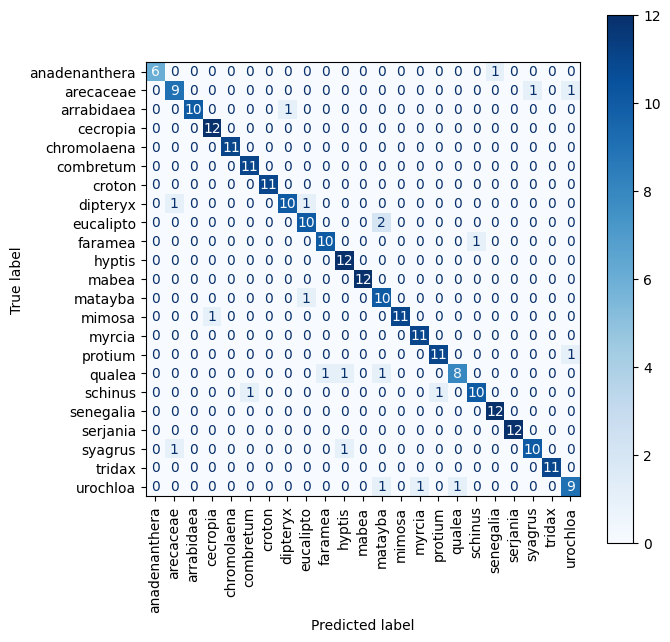

In [34]:
plt.rcParams["figure.figsize"] = (7,7)
plt.rcParams['figure.dpi'] = 100

plot_confusion_matrix(clf, X_test, y_test, xticks_rotation='vertical', cmap='Blues')  
plt.show() 

In [19]:
sample_img_index = -1 
img_path = img_flist[sample_img_index]
img = Image.open(img_path)
vec = get_img_vec(img)
clf.predict([vec])

array(['urochloa'], dtype=object)